In [ ]:
#pip install WordCloud

In [1]:
import pandas as pd
import numpy as np
import re  ## regular exprations
import string
import nltk
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("BBC News Train.csv")
df1

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [3]:
df2=pd.read_csv("BBC News Test.csv")

In [4]:
df3=pd.read_csv("BBC News Sample Solution.csv")
df2["Category"]=df3["Category"]
df2.tail()

,ArticleId,Text,Category
730,1923,eu to probe alitalia state aid the european ...,sport
731,373,u2 to play at grammy awards show irish rock ba...,tech
732,1704,sport betting rules in spotlight a group of mp...,business
733,206,alfa romeos to get gm engines fiat is to sto...,entertainment
734,471,citizenship event for 18s touted citizenship c...,politics


In [5]:
df=df1.append(df2)
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
df.shape

(2225, 3)

In [7]:
df.Category.value_counts()

sport            493
business         483
politics         421
entertainment    420
tech             408
Name: Category, dtype: int64

### EDA

In [8]:
df.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [9]:
cat=df.Category.value_counts()
cat_ind=list(cat.index)
cat_val=list(cat.values)

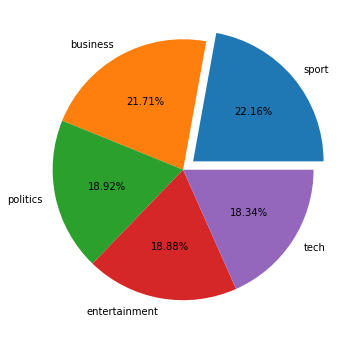

In [10]:
plt.figure(figsize=(7,6))
plt.pie(cat_val,labels=cat_ind,autopct='%1.2f%%',explode=(0.1,0,0,0,0));

(-0.5, 399.5, 199.5, -0.5)

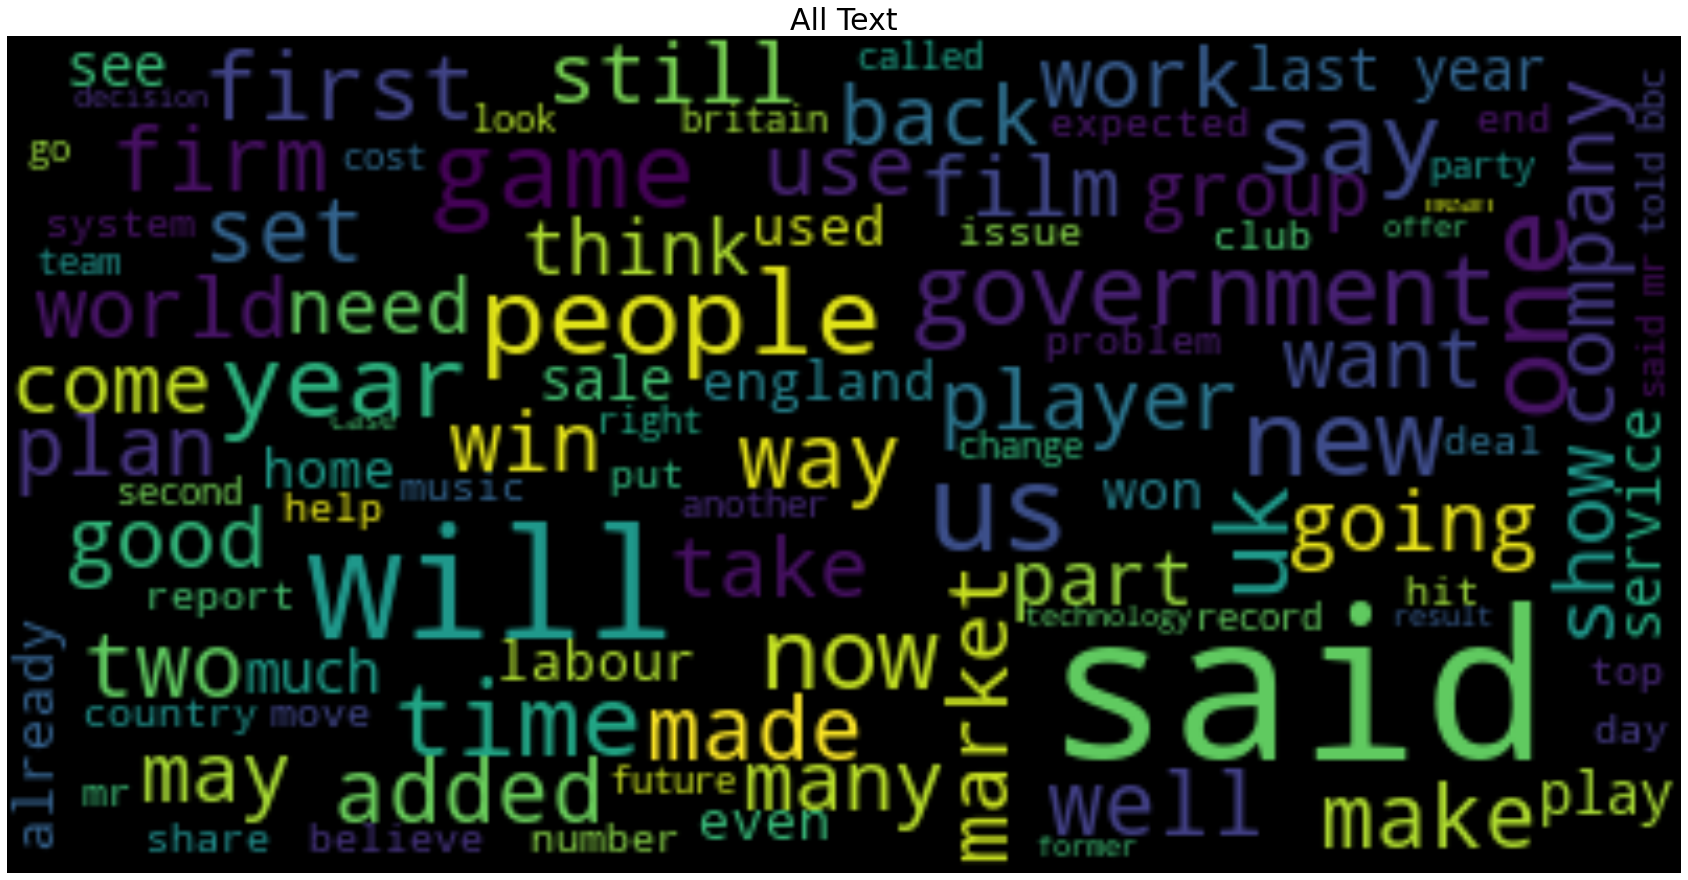

In [11]:
from wordcloud import WordCloud
# Start with one review:
all_text = " ".join(review for review in df.Text)
fig, ax = plt.subplots(1,1, figsize = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(all_text)
# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('All Text', fontsize=30)
ax.axis('off')
#wordcloud.to_file("img/first_review.png")

### Text Preprocessing

In [11]:
def CleanText(text):
    text=re.sub('\d',' ',text) # Remove number
    text=re.sub(' +',' ',text) # Remove extra spaces
    text = "".join([char.lower() for char in text if char not in string.punctuation]) # Removing punctuation and normalization
    
    return text

In [12]:
df["clean_Text"]=df["Text"].apply(CleanText)
df.head()

,ArticleId,Text,Category,clean_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in m payout eighteen former enro...


In [13]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize(text):
    token=word_tokenize(text)
    return token

df["token_Text"]=df["clean_Text"].apply(tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ArticleId,Text,Category,clean_Text,token_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in m payout eighteen former enro...,"[enron, bosses, in, m, payout, eighteen, forme..."


In [14]:
## Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  txt_clean = [word for word in text if word not in stopwords]
  return txt_clean

df["stop_Text"]=df["token_Text"].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ArticleId,Text,Category,clean_Text,token_Text,stop_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in m payout eighteen former enro...,"[enron, bosses, in, m, payout, eighteen, forme...","[enron, bosses, payout, eighteen, former, enro..."


In [15]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemming(text):
    stem_text=[ps.stem(word) for word in text]
    return stem_text

df["stem_Text"]=df["stop_Text"].apply(stemming)
df.head()

,ArticleId,Text,Category,clean_Text,token_Text,stop_Text,stem_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launch, defenc, lawyer, def..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, busi, confid, slide, german, busi, co..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indic, econom, gloom, citizen, maj..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyl, govern, mobil, choic, faster, bette..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in m payout eighteen former enro...,"[enron, bosses, in, m, payout, eighteen, forme...","[enron, bosses, payout, eighteen, former, enro...","[enron, boss, payout, eighteen, former, enron,..."


In [16]:
df['Fin_Text']=df['stem_Text'].apply(lambda x: ' '.join(map(str, x)))

In [17]:
df["Fin_Text"]

0      worldcom exboss launch defenc lawyer defend fo...
1      german busi confid slide german busi confid fe...
2      bbc poll indic econom gloom citizen major nati...
3      lifestyl govern mobil choic faster better funk...
4      enron boss payout eighteen former enron direct...
                             ...                        
730    eu probe alitalia state aid european commiss o...
731    u play grammi award show irish rock band u pla...
732    sport bet rule spotlight group mp peer call ti...
733    alfa romeo get gm engin fiat stop make sixcyli...
734    citizenship event tout citizenship ceremoni co...
Name: Fin_Text, Length: 2225, dtype: object

### Feature Extraction

### 1. Bag of Word

In [18]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
CountVec=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=CountVec.fit_transform(df.Fin_Text).toarray()

In [19]:
x.shape

(2225, 5000)

In [20]:
CountVec.get_feature_names()[:10]

['aaa',
 'abandon',
 'abba',
 'abc',
 'abil',
 'abl',
 'abolish',
 'abort',
 'abroad',
 'absenc']

In [21]:
x_bow=pd.DataFrame(x, columns=CountVec.get_feature_names())
x_bow.head()

,aaa,abandon,abba,abc,abil,abl,abolish,abort,abroad,absenc,...,youth,yuan,yugansk,yuganskneftega,yuko,yuko claim,yushchenko,zealand,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [22]:
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x=tfidf.fit_transform(df.Fin_Text).toarray()

In [23]:
x.shape

(2225, 5000)

In [24]:
x_tfidf=pd.DataFrame(x, columns=tfidf.get_feature_names())
x_tfidf.head()

,aaa,abandon,abba,abc,abil,abl,abolish,abort,abroad,absenc,...,youth,yuan,yugansk,yuganskneftega,yuko,yuko claim,yushchenko,zealand,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.022472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Category"]=le.fit_transform(df.Category)
y=df["Category"]

In [56]:
print(x_bow.shape)
print(x_tfidf.shape)
print(y.shape)

(2225, 5000)
(2225, 5000)
(2225,)


### Model building

In [57]:
from sklearn.model_selection import train_test_split
xtrain_bow,xtest_bow,ytrain_bow,ytest_bow=train_test_split(x_bow,y,test_size=0.3,random_state=0)
xtrain_tfidf,xtest_tfidf,ytrain_tfidf,ytest_tfidf=train_test_split(x_tfidf,y,test_size=0.3,random_state=0)

### Naive-Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB
NB_model_bow=MultinomialNB()
NB_model_bow.fit(xtrain_bow,ytrain_bow)
ypred_bow=NB_model_bow.predict(xtest_bow)

NB_model_tfidf=MultinomialNB()
NB_model_tfidf.fit(xtrain_tfidf,ytrain_tfidf)
ypred_tfidf=NB_model_tfidf.predict(xtest_tfidf)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest_bow,ypred_bow))
print("Accuracy of Naive-Bayes model using BOW is : ",accuracy_score(ytest_bow,ypred_bow))
print("=="*30)
print(confusion_matrix(ytest_tfidf,ypred_tfidf))
print("Accuracy of Naive-Bayes model using TF-IDF is : ",accuracy_score(ytest_tfidf,ypred_tfidf))

[[108   8  13  12  10]
 [  9  86  17   4   5]
 [ 11   7  80  17  15]
 [ 11   6   5 114  11]
 [  9   5  12   7  86]]
Accuracy of Naive-Bayes model using BOW is :  0.7095808383233533
[[112   8  10  12   9]
 [  9  85  17   5   5]
 [ 11   7  80  17  15]
 [ 10   6   5 114  12]
 [ 10   5  12   7  85]]
Accuracy of Naive-Bayes model using TF-IDF is :  0.7125748502994012


In [60]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_NB_model_bow=MultinomialNB(alpha=alpha)
    sub_NB_model_bow.fit(xtrain_bow,ytrain_bow)
    ypred_bow=sub_NB_model_bow.predict(xtest_bow)
    score=accuracy_score(ytest_bow,ypred_bow)
    if score>previous_score:
        NB_model_bow=sub_NB_model_bow
    print("Alpha: {}, score: {}".format(alpha,score))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, score: 0.6796407185628742
Alpha: 0.1, score: 0.7095808383233533
Alpha: 0.2, score: 0.7080838323353293
Alpha: 0.30000000000000004, score: 0.7095808383233533
Alpha: 0.4, score: 0.7095808383233533
Alpha: 0.5, score: 0.7095808383233533
Alpha: 0.6000000000000001, score: 0.7095808383233533
Alpha: 0.7000000000000001, score: 0.7095808383233533
Alpha: 0.8, score: 0.7095808383233533
Alpha: 0.9, score: 0.7095808383233533


### SVM

In [61]:
from sklearn.svm import SVC
SV_model_bow=SVC(C=1)
SV_model_bow.fit(xtrain_bow,ytrain_bow)
ypred_bow=SV_model_bow.predict(xtest_bow)

SV_model_tfidf=SVC(C=1)
SV_model_tfidf.fit(xtrain_tfidf,ytrain_tfidf)
ypred_tfidf=SV_model_tfidf.predict(xtest_tfidf)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest_bow,ypred_bow))
print("Accuracy of SVM model using BOW is : ",accuracy_score(ytest_bow,ypred_bow))
print("=="*30)
print(confusion_matrix(ytest_tfidf,ypred_tfidf))
print("Accuracy of SVM model using TF-IDF is : ",accuracy_score(ytest_tfidf,ypred_tfidf))

[[112   8  11  13   7]
 [  8  85  15   5   8]
 [ 11   7  76  21  15]
 [ 11   5   5 114  12]
 [ 11   5  11   7  85]]
Accuracy of SVM model using BOW is :  0.7065868263473054
[[109   8  12  14   8]
 [  9  84  16   4   8]
 [ 11  10  78  18  13]
 [ 10   7   5 114  11]
 [ 13   6  12   7  81]]
Accuracy of SVM model using TF-IDF is :  0.6976047904191617


### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
DT_model_bow=DecisionTreeClassifier()
DT_model_bow.fit(xtrain_bow,ytrain_bow)
ypred_bow=DT_model_bow.predict(xtest_bow)

DT_model_tfidf=DecisionTreeClassifier()
DT_model_tfidf.fit(xtrain_tfidf,ytrain_tfidf)
ypred_tfidf=DT_model_tfidf.predict(xtest_tfidf)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest_bow,ypred_bow))
print("Accuracy of Decision Tree model using BOW is : ",accuracy_score(ytest_bow,ypred_bow))
print("=="*30)
print(confusion_matrix(ytest_tfidf,ypred_tfidf))
print("Accuracy of Decision Tree model using TF-IDF is : ",accuracy_score(ytest_tfidf,ypred_tfidf))

[[61 19 20 24 27]
 [11 49 22 14 25]
 [21 12 55 25 17]
 [19 20  8 79 21]
 [21  9 18  6 65]]
Accuracy of Decision Tree model using BOW is :  0.4625748502994012
[[76 14 17 32 12]
 [19 57 18 16 11]
 [19 13 56 26 16]
 [14 21 17 77 18]
 [21  8 13 14 63]]
Accuracy of Decision Tree model using TF-IDF is :  0.49251497005988026


### Random Forest 

In [64]:
from sklearn.ensemble import RandomForestClassifier
RF_model_bow=RandomForestClassifier(n_estimators=150)
RF_model_bow.fit(xtrain_bow,ytrain_bow)
ypred_bow=RF_model_bow.predict(xtest_bow)

RF_model_tfidf=RandomForestClassifier(n_estimators=150)
RF_model_tfidf.fit(xtrain_tfidf,ytrain_tfidf)
ypred_tfidf=RF_model_tfidf.predict(xtest_tfidf)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest_bow,ypred_bow))
print("Accuracy of Random Forest model using BOW is : ",accuracy_score(ytest_bow,ypred_bow))
print("=="*30)
print(confusion_matrix(ytest_tfidf,ypred_tfidf))
print("Accuracy of Random Forest model using TF-IDF is : ",accuracy_score(ytest_tfidf,ypred_tfidf))

[[110   8  10  14   9]
 [ 11  83  17   4   6]
 [ 15   9  74  20  12]
 [ 10   6   7 113  11]
 [ 11   5  12   7  84]]
Accuracy of Random Forest model using BOW is :  0.6946107784431138
[[112   8   8  14   9]
 [ 11  82  15   7   6]
 [ 14   9  73  21  13]
 [ 10   9   7 111  10]
 [ 12   5  12   7  83]]
Accuracy of Random Forest model using TF-IDF is :  0.6901197604790419


### Word Embedding

In [38]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import SGD

In [39]:
voc_size=10000

### Onehot Representation

In [40]:
Text=df["Fin_Text"]

In [41]:
Text.head()

0    worldcom exboss launch defenc lawyer defend fo...
1    german busi confid slide german busi confid fe...
2    bbc poll indic econom gloom citizen major nati...
3    lifestyl govern mobil choic faster better funk...
4    enron boss payout eighteen former enron direct...
Name: Fin_Text, dtype: object

In [42]:
onehot_rep=[one_hot(words,voc_size)for words in Text]
onehot_rep[0]

[1420,
 3069,
 8634,
 5379,
 7305,
 3198,
 7041,
 1420,
 4667,
 971,
 3247,
 5471,
 7645,
 4408,
 8000,
 222,
 8779,
 8941,
 3653,
 8094,
 8628,
 1420,
 220,
 4875,
 9600,
 7811,
 7836,
 4664,
 9600,
 3194,
 6788,
 9390,
 5828,
 8298,
 6941,
 3122,
 3960,
 7145,
 8569,
 5032,
 9536,
 5032,
 9600,
 7645,
 8510,
 3247,
 2455,
 3599,
 4408,
 7645,
 3494,
 9593,
 7305,
 9520,
 8510,
 3247,
 4796,
 4336,
 9600,
 8682,
 1420,
 9002,
 6099,
 892,
 7234,
 5551,
 6541,
 2069,
 3064,
 858,
 9795,
 5344,
 5957,
 8628,
 5710,
 3569,
 566,
 9997,
 3265,
 1832,
 2638,
 3348,
 6492,
 4141,
 1464,
 6186,
 1380,
 1420,
 9600,
 4317,
 1667,
 6186,
 9448,
 2338,
 8046,
 6890,
 3194,
 8797,
 1420,
 8510,
 3247,
 7305,
 1667,
 8758,
 7645,
 9520,
 4141,
 7811,
 3246,
 5957,
 8628,
 4672,
 1667,
 7364,
 2069,
 8510,
 3247,
 497,
 9198,
 2132,
 4957,
 222,
 8279,
 4667,
 7953,
 5534,
 3328,
 9593,
 2431,
 3653,
 7041,
 1420,
 325,
 4667,
 4117,
 6593,
 1667,
 8510,
 3247,
 9002,
 9600,
 9920,
 3960,
 309,
 4

### Embendding Representation

In [43]:
sent_length=2200
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2043 2295 5032]
 [   0    0    0 ... 4892 4379 4818]
 [   0    0    0 ... 4822  441 3607]
 ...
 [   0    0    0 ... 4765 5572 9330]
 [   0    0    0 ... 5271 2820 8567]
 [   0    0    0 ... 4788 4765  199]]


In [45]:
### Creating model
embedded_vector_features=100
model=Sequential() 
model.add(Embedding(voc_size,embedded_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(300)))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2200, 100)         1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               962400    
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3005      
Total params: 1,965,405
Trainable params: 1,965,405
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
embedded_docs.shape

(2225, 2200)

In [47]:
import numpy as np
x=np.array(embedded_docs)
y = pd.get_dummies(df['Category']).values
y=np.array(y)

In [48]:
x.shape,y.shape

((2225, 2200), (2225, 5))

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Model Training

In [50]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=4,batch_size=32,verbose=1)

Epoch 1/4
49/49 [==============================] - 70s 1s/step - loss: 1.6093 - accuracy: 0.2588 - val_loss: 1.5742 - val_accuracy: 0.3338
Epoch 2/4
49/49 [==============================] - 60s 1s/step - loss: 1.3955 - accuracy: 0.4265 - val_loss: 1.4443 - val_accuracy: 0.3578
Epoch 3/4
49/49 [==============================] - 60s 1s/step - loss: 1.1540 - accuracy: 0.5568 - val_loss: 1.3726 - val_accuracy: 0.4671
Epoch 4/4
49/49 [==============================] - 60s 1s/step - loss: 0.7640 - accuracy: 0.7733 - val_loss: 1.3693 - val_accuracy: 0.5195


In [51]:
pred=model.predict(xtest)

In [52]:
pred

array([[0.30649236, 0.05475508, 0.5366786 , 0.00384499, 0.09822905],
       [0.39512235, 0.12087823, 0.36602503, 0.0160311 , 0.10194331],
       [0.6785532 , 0.03358809, 0.15141392, 0.02601608, 0.11042874],
       ...,
       [0.11572571, 0.31046173, 0.11981492, 0.30762422, 0.1463734 ],
       [0.5733178 , 0.01838035, 0.3212427 , 0.00508614, 0.08197294],
       [0.01651906, 0.23337527, 0.0160611 , 0.7078602 , 0.02618439]],
      dtype=float32)

In [53]:
pred.shape[0]

668

In [54]:
labels=[0,1,2,3,4]
y_pred=[]
for i in range(pred.shape[0]):
  y_pred.append(labels[np.argmax(pred[i])])

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
labels=[0,1,2,3,4]
y_test=[]
for i in range(ytest.shape[0]):
  y_test.append(labels[np.argmax(ytest[i])])

In [57]:
confusion_matrix(y_test,y_pred)

array([[87,  9, 32, 15,  8],
       [21, 52, 28, 13,  7],
       [28, 18, 57, 18,  9],
       [21, 12,  9, 95, 10],
       [32,  9, 15,  7, 56]])

In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy of LSTM Model is : ".accuracy_score(y_test,y_pred)

0.5194610778443114

## we conclude that for sorting of BBC’s news article  Naïve Bayes gives highest Accuracy i.e 71.25 % using TF-IDF feature extraction method!